# Descriptive statistics and EDA

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import scipy
import numpy as np

In [14]:
df_all_data = pd.DataFrame()
for file in os.listdir('../ndvi_data/new_columns_data/'):
    df_modified = pd.read_csv('../ndvi_data/new_columns_data/'+file)
    df_modified['date'] = pd.to_datetime(file[:-4], format= "%Y-%m-%d")
    df_all_data = pd.concat([df_all_data,df_modified], ignore_index=True)
df_all_data.head().style

,system:index,NDVI,longitude,latitud,QA_general,QA_usefulness,QA_aerosol,QA_adjacent_cloud,QA_water,date
0,0,0.465100,-36.535336,-6.842893,goodQA,highest,low,no,land,2010-01-01 00:00:00
1,1,0.467900,-36.526278,-6.842893,goodQA,highest,low,no,land,2010-01-01 00:00:00
2,2,0.510400,-36.490047,-6.842893,goodQA,lower,low,no,land,2010-01-01 00:00:00
3,3,0.460000,-36.526966,-6.851886,goodQA,highest,low,no,land,2010-01-01 00:00:00
4,4,0.442200,-36.517909,-6.851886,goodQA,highest,low,no,land,2010-01-01 00:00:00


In [16]:
df_all_data.dtypes

system:index                  int64
NDVI                        float64
longitude                   float64
latitud                     float64
QA_general                   object
QA_usefulness                object
QA_aerosol                   object
QA_adjacent_cloud            object
QA_water                     object
date                 datetime64[ns]
dtype: object

## Univariate

### NDVI

Distribution of the data:

- Positively skewed distribution. Hence median should be used for describe the data.
- Considering Q3 at least than 75% of the data seems to represent areas with sparse vegetation. 


According to the USGA (https://www.usgs.gov/special-topics/remote-sensing-phenology/science/ndvi-foundation-remote-sensing-phenology#overview):
      NDVI < 0.1 - barren rock, sand, or snow.
0.2 < NDVI > 0.5 - sparse vegetation
0.6 < NDVI > 0.9 - dense vegetation 

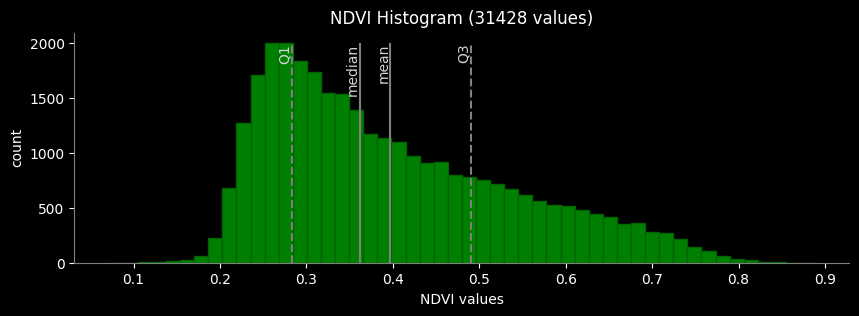

In [17]:
plt.figure(figsize=(10,3), facecolor='black')
ax = plt.axes()
ax.set_facecolor('black')

plt.hist(df_all_data.NDVI, bins = 50, color = 'green', edgecolor='darkgreen')

plt.title('NDVI Histogram (31428 values)',color='white')
plt.xlabel('NDVI values', color='white')
plt.ylabel('count', color= 'white')

ax.tick_params(colors= 'white')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

ax.vlines(x= df_all_data.NDVI.describe()['mean'],color='grey',ymax=2000, ymin=0, label='mean')
ax.text(x= df_all_data.NDVI.describe()['mean'], y= 2000, s='mean', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

ax.vlines(x= df_all_data.NDVI.median(), color='grey',ymax=2000, ymin=0, label='mean')
ax.text(x= df_all_data.NDVI.median(), y= 2000, s='median', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

ax.vlines(x= df_all_data.NDVI.describe()['25%'],color='grey',ymax=2000, ymin=0, label='mean', ls='--')
ax.text(x= df_all_data.NDVI.describe()['25%'], y= 2000, s='Q1', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

ax.vlines(x = df_all_data.NDVI.describe()['75%'],color='grey',ymax=2000, ymin=0, label='mean',ls='--')
ax.text(x= df_all_data.NDVI.describe()['75%'], y= 2000, s='Q3', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

plt.show()

Stats

In [18]:
print(df_all_data.NDVI.describe())
print('median', df_all_data.NDVI.median())

count    31428.000000
mean         0.397059
std          0.140065
min          0.072300
25%          0.283000
50%          0.361800
75%          0.490625
max          0.887500
Name: NDVI, dtype: float64
median 0.3618


### Date

From 2011, there has been correcitons of the dates of the data regarding the first day of the year.
The data that has 14 days of gap is due the previous bussextile year.

What happened with previous years?
2010 is th only previous data we currently have.

In [19]:
df_date = df_all_data.copy()[['date']].drop_duplicates().reset_index(drop = True)
df_date['diff_days'] = df_date.date.diff() 

print(df_date['diff_days'].value_counts())

diff_days
16 days    132
13 days      4
14 days      1
Name: count, dtype: int64


In [20]:
df_date.loc[df_date['diff_days'] == pd.Timedelta('13 days'),:].style

,date,diff_days
23,2011-01-01 00:00:00,13 days 00:00:00
46,2012-01-01 00:00:00,13 days 00:00:00
92,2014-01-01 00:00:00,13 days 00:00:00
115,2015-01-01 00:00:00,13 days 00:00:00


In [21]:
df_date.loc[df_date['diff_days'] == pd.Timedelta('14 days'),:].style

,date,diff_days
69,2013-01-01 00:00:00,14 days 00:00:00


#### Time series

In [22]:
set(zip(df_all_data.longitude, df_all_data.latitud))

{(-36.53536976649717, -6.843337985549752),
 (-36.53533571462549, -6.842892998725961),
 (-36.535301665021024, -6.842448011902168),
 (-36.527000535459294, -6.8523311914723495),
 (-36.52696644621816, -6.851886204648558),
 (-36.52693235924388, -6.851441217824767),
 (-36.52631203022179, -6.843337985549752),
 (-36.52627798679213, -6.842892998725961),
 (-36.52624394562914, -6.842448011902168),
 (-36.519322074546885, -6.870317603317545),
 (-36.51928790214605, -6.869872616493754),
 (-36.51925373201195, -6.8694276296699615),
 (-36.51863188862085, -6.861324397394947),
 (-36.5185977620287, -6.860879410571156),
 (-36.51856363770306, -6.860434423747364),
 (-36.51794262844948, -6.8523311914723495),
 (-36.51790854766173, -6.851886204648558),
 (-36.51787446914029, -6.851441217824767),
 (-36.51095476572329, -6.879310809240143),
 (-36.51092055599697, -6.878865822416351),
 (-36.51088634853703, -6.87842083559256),
 (-36.51026382537939, -6.870317603317545),
 (-36.510229661454666, -6.869872616493754),
 (-36.

In [30]:
df_all_data_ts = pd.DataFrame()
for file in os.listdir('../ndvi_data/new_columns_data/'):
    df_modified = pd.read_csv('../ndvi_data/new_columns_data/'+file)[['longitude']]
    df_modified['date'] = pd.to_datetime(file[:-4], format= "%Y-%m-%d")
    df_all_data_ts = pd.merge([df_all_data_ts,df_modified], how = 'inner', ignore_index=True)

TypeError: merge() got an unexpected keyword argument 'ignore_index'

Even thouhg the whole dataset is skewed, the data by date is normal distribution.

### QA

##### QA_usefulness
No 'decreasing10','lowest','useless','faultyL1B', or 'unuseful' data was found.
This may support the findings of the general quality, where no major impact was seen.

Nevertheless, we still have to considere the consequences of the decreasing usefulness.

In [24]:
tpl_usefulness = ('highest', 'lower','decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9')
df_all_data.QA_usefulness.value_counts()

QA_usefulness
highest        18838
lower           9543
decreasing1     1542
decreasing2      826
decreasing3      355
decreasing4      202
decreasing5       52
decreasing6       43
decreasing7       18
decreasing8        8
decreasing9        1
Name: count, dtype: int64

#### Decreasing9

In [33]:
avaiable_dates = list(df_all_data.date.unique())
i_utility = 1

distr_ndvi = {'dist_8':[],'dist_7':[],'dist_6':[],'dist_5':[],'dist_4':[],'dist_3':[],'dist_2':[],'dist_1':[],'lower':[]}
key_distr = list(distr_ndvi.keys())
for i_other_qualities in range(9-i_utility):
    for i_date in avaiable_dates:
        df_selected_date = df_all_data[df_all_data.date == i_date]
        df_selected_quality = df_selected_date[df_selected_date.QA_usefulness == tpl_usefulness[-1-i_utility]]
        df_other_qualities = df_selected_date[df_selected_date.QA_usefulness.isin(tpl_usefulness[:-i_other_qualities-1])]

        
        mean_other_qualities = df_other_qualities.NDVI.describe()['mean']
        ndvi_selected_qualities = list(df_selected_quality.NDVI)
        
        distr_ndvi[key_distr[i_other_qualities]] += list(ndvi_selected_qualities - mean_other_qualities)

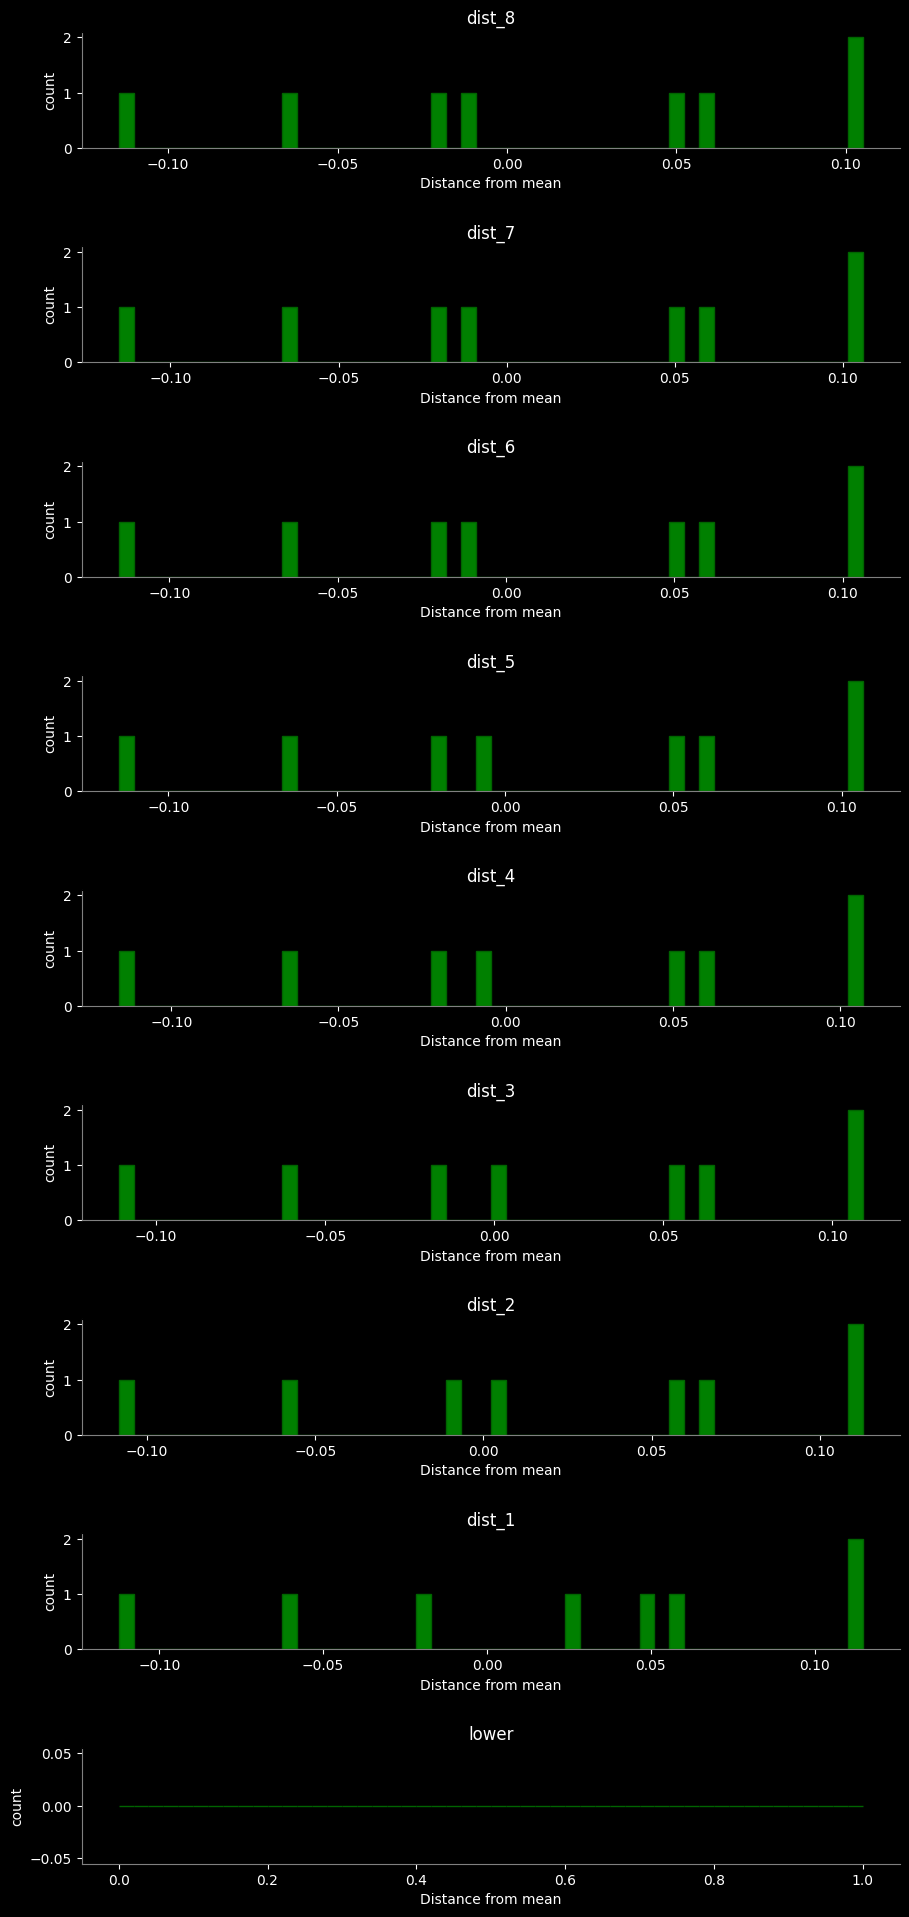

In [34]:

fig, axes = plt.subplots(9,1,figsize=(10,20), facecolor='black')
fig.tight_layout(pad=5.0)
for i in range(9):
    ax = axes[i]
    ax.set_facecolor('black')

    ax.hist(distr_ndvi[key_distr[i]], bins = 50, color = 'green', edgecolor='darkgreen')

    ax.set_title(key_distr[i], color='white')
    ax.set_xlabel('Distance from mean',color='white')
    ax.set_ylabel('count', color= 'white')

    ax.tick_params(colors= 'white')
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('grey')

#plt.title('This is a somewhat long figure title')

plt.show()


In [184]:
print(sum(distr_ndvi['dist_8']))

AttributeError: 'list' object has no attribute 'mean'

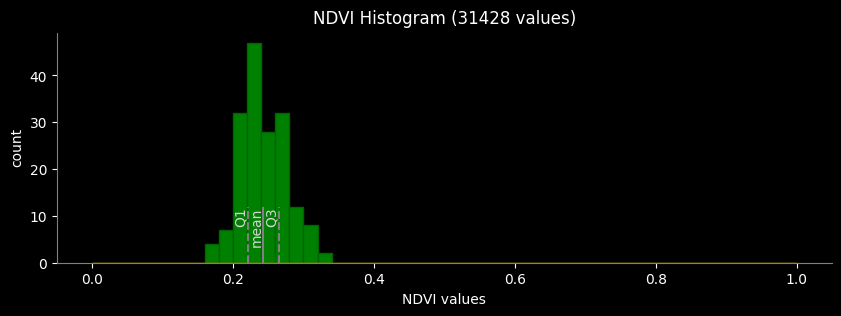

In [183]:

plt.figure(figsize=(10,3), facecolor='black')
ax = plt.axes()
ax.set_facecolor('black')

plt.hist(df_other_qualities.NDVI, bins = 50, color = 'green', edgecolor='darkgreen',range = (0,1))
plt.hist(df_selected_quality.NDVI, bins = 50, color = 'orange', edgecolor='darkorange',range = (0,1))


plt.title('NDVI Histogram (31428 values)',color='white')
plt.xlabel('NDVI values', color='white')
plt.ylabel('count', color= 'white')

ax.tick_params(colors= 'white')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')



ax.vlines(x= df_other_qualities.NDVI.describe()['mean'],color='grey',ymax=12, ymin=0, label='mean')
ax.text(x= df_other_qualities.NDVI.describe()['mean'], y= 12, s='mean', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

ax.vlines(x= df_other_qualities.NDVI.describe()['25%'],color='grey',ymax=12, ymin=0, label='mean', ls='--')
ax.text(x= df_other_qualities.NDVI.describe()['25%'], y= 12, s='Q1', color='lightgrey', ha ='right', va = 'top', rotation='vertical')

ax.vlines(x = df_other_qualities.NDVI.describe()['75%'],color='grey',ymax=12, ymin=0, label='mean',ls='--')
ax.text(x= df_other_qualities.NDVI.describe()['75%'], y= 12, s='Q3', color='lightgrey', ha ='right', va = 'top', rotation='vertical')


plt.show()

##### QA_general
Not unmade data was found: meaning that there were not strong factors that affected the index


In [10]:
df_all_data.QA_general.value_counts()

QA_general
goodQA       28524
regularQA     2166
cloudy         738
Name: count, dtype: int64

##### QA_aerosol
It would better to know the impact of this factor.

In [12]:
df_all_data.QA_aerosol.value_counts()

QA_aerosol
low             28666
intermediate     1930
correction        622
high              210
Name: count, dtype: int64

##### QA_adjacent_cloud

In [13]:
df_all_data.QA_adjacent_cloud.value_counts()

QA_adjacent_cloud
no     28016
yes     3412
Name: count, dtype: int64

##### QA_water

In [14]:
df_all_data.QA_water.value_counts()

QA_water
land                    27729
shorelines               3676
shallow inland water       23
Name: count, dtype: int64

## multivatiriate

### QA

##### QA general vs usefulnes

Most of the highest usefulness is found in 'goodQA' (99.8 % of the values), the other (0.2%) is found in cloudy.

In [174]:
tab_general_usefulness = df_all_data[['QA_usefulness','QA_general']].value_counts().reset_index().pivot_table(columns= 'QA_general', index='QA_usefulness', values = 'count').fillna(0)
tab_general_usefulness = (tab_general_usefulness
                          .reindex(index=['highest', 'lower', 'decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9'])
                          [['goodQA','regularQA','cloudy']]
                          )
print(tab_general_usefulness)
print('--------------------------------------------')
df_percentage = tab_general_usefulness.div(tab_general_usefulness.sum(axis=1), axis=0) * 100

print(df_percentage.round(2))
# fig, axes = plt.subplots(3, figsize=(15, 8))

# axes[0].bar(tab_general_usefulness.index, tab_general_usefulness['goodQA'])
# axes[0].set_title(f'goodQA', fontsize=10)

# axes[1].bar(tab_general_usefulness.index, tab_general_usefulness['cloudy'])
# axes[1].set_title(f'cloudy', fontsize=10)

# axes[2].bar(tab_general_usefulness.index, tab_general_usefulness['regularQA'] )
# axes[2].set_title(f'regularQA', fontsize=10)

# plt.tight_layout()
#plt.show()

QA_general      goodQA  regularQA  cloudy
QA_usefulness                            
highest        18807.0        0.0    31.0
lower           9167.0      300.0    76.0
decreasing1      344.0      874.0   324.0
decreasing2      187.0      473.0   166.0
decreasing3       19.0      297.0    39.0
decreasing4        0.0      162.0    40.0
decreasing5        0.0       28.0    24.0
decreasing6        0.0       32.0    11.0
decreasing7        0.0        0.0    18.0
decreasing8        0.0        0.0     8.0
decreasing9        0.0        0.0     1.0
--------------------------------------------
QA_general     goodQA  regularQA  cloudy
QA_usefulness                           
highest         99.84       0.00    0.16
lower           96.06       3.14    0.80
decreasing1     22.31      56.68   21.01
decreasing2     22.64      57.26   20.10
decreasing3      5.35      83.66   10.99
decreasing4      0.00      80.20   19.80
decreasing5      0.00      53.85   46.15
decreasing6      0.00      74.42   25.58

QA cloud and usefulness

In [179]:
tab_cloud_usefulness = df_all_data[['QA_usefulness','QA_adjacent_cloud']].value_counts().reset_index().pivot_table(columns= 'QA_adjacent_cloud', index='QA_usefulness', values = 'count').fillna(0)
tab_cloud_usefulness = tab_cloud_usefulness.reindex(index=['highest', 'lower', 'decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9'])
print(tab_cloud_usefulness)
print('-------------------------------------')

df_percentage = tab_cloud_usefulness.div(tab_cloud_usefulness.sum(axis=1), axis=0) * 100
print(df_percentage.round(2))

QA_adjacent_cloud       no     yes
QA_usefulness                     
highest            18838.0     0.0
lower               8335.0  1208.0
decreasing1          552.0   990.0
decreasing2          214.0   612.0
decreasing3           35.0   320.0
decreasing4           22.0   180.0
decreasing5           16.0    36.0
decreasing6            4.0    39.0
decreasing7            0.0    18.0
decreasing8            0.0     8.0
decreasing9            0.0     1.0
-------------------------------------
QA_adjacent_cloud      no     yes
QA_usefulness                    
highest            100.00    0.00
lower               87.34   12.66
decreasing1         35.80   64.20
decreasing2         25.91   74.09
decreasing3          9.86   90.14
decreasing4         10.89   89.11
decreasing5         30.77   69.23
decreasing6          9.30   90.70
decreasing7          0.00  100.00
decreasing8          0.00  100.00
decreasing9          0.00  100.00


QA Aerosol and usefulness

In [176]:
tab_aerosol_usefulness = df_all_data[['QA_usefulness','QA_aerosol']].value_counts().reset_index().pivot_table(columns= 'QA_aerosol', index='QA_usefulness', values = 'count').fillna(0)
tab_aerosol_usefulness = (tab_aerosol_usefulness
                          .reindex(index=['highest', 'lower', 'decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9'])
                          [['low','intermediate','correction','high']]
                          )

print(tab_aerosol_usefulness)
print('------------------------------------------------------------')

df_percentage = tab_aerosol_usefulness.div(tab_aerosol_usefulness.sum(axis=1), axis=0) * 100
print(df_percentage.round(2))

QA_aerosol         low  intermediate  correction  high
QA_usefulness                                         
highest        18838.0           0.0         0.0   0.0
lower           9240.0         303.0         0.0   0.0
decreasing1      349.0         906.0       287.0   0.0
decreasing2      194.0         380.0       246.0   6.0
decreasing3       40.0         220.0        36.0  59.0
decreasing4        3.0         103.0        36.0  60.0
decreasing5        2.0           9.0        17.0  24.0
decreasing6        0.0           6.0         0.0  37.0
decreasing7        0.0           3.0         0.0  15.0
decreasing8        0.0           0.0         0.0   8.0
decreasing9        0.0           0.0         0.0   1.0
------------------------------------------------------------
QA_aerosol        low  intermediate  correction    high
QA_usefulness                                          
highest        100.00          0.00        0.00    0.00
lower           96.82          3.18        0.00    0.00


In [180]:
df_all_data[df_all_data.QA_usefulness == "decreasing9"]

,system:index,NDVI,longitude,latitud,QA_general,QA_usefulness,QA_aerosol,QA_adjacent_cloud,QA_water,date
1146,8,0.4185,-36.481711,-6.852331,cloudy,decreasing9,high,yes,land,2010-03-22


<Figure size 640x480 with 0 Axes>

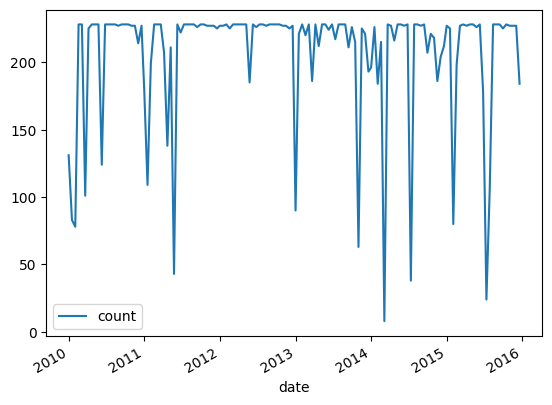

In [13]:
date_general = df_all_data[['date','QA_general']].groupby('date').value_counts().reset_index()
date_good = date_general[date_general.QA_general == 'goodQA']
plt.figure()
date_good.plot(kind = 'line',x='date', y='count')
plt.show()

In [ ]:
date_general